In [247]:
import pandas as pd

In [248]:
import pathlib

# define the path
directory = pathlib.Path('Interpolation')

# define the pattern
currentCompany = 'RPD'

for currentFile in directory.glob(currentCompany):
    print(currentFile)

fileDen = 'InterpolatedDenWeek' + str(currentCompany) + '.csv'
modelDen = 'modelDen' + str(currentCompany) + '.json'
weightsDen = 'modelDen' + str(currentCompany) + '.h5'
metricsDen = str(currentCompany) + '_metricsDen' +  '.txt'

print(currentFile/fileDen)
print(currentFile/modelDen)
print(currentFile/weightsDen)
print(currentFile/r2ScoreDen)

Interpolation\RPD
Interpolation\RPD\InterpolatedDenWeekRPD.csv
Interpolation\RPD\modelDenRPD.json
Interpolation\RPD\modelDenRPD.h5
Interpolation\RPD\CHKP_R2ScoreDen.txt


In [249]:
df = pd.read_csv(currentFile/fileDen)

In [250]:
df

,DATES,D Revenue,U CR,D OE,U NOI,U CAPEX,U WK,D FCF
0,2018-07-01,6706.631771,2494.858137,8098.524772,320.889181,1237.557945,55856.015989,3929.498175
1,2018-07-08,6665.842730,2466.183737,8075.022932,333.671146,1226.680427,54650.716882,4203.979051
2,2018-07-15,6625.053688,2437.509336,8051.521092,346.453110,1215.802910,53445.417775,4478.459926
3,2018-07-22,6584.264647,2408.834935,8028.019252,359.235075,1204.925392,52240.118669,4752.940802
4,2018-07-29,6543.475606,2380.160534,8004.517412,372.017039,1194.047875,51034.819562,5027.421678
...,...,...,...,...,...,...,...,...
75,2019-12-08,7491.843749,3526.017607,5682.744204,499.194538,2811.614127,28192.338202,5790.086956
76,2019-12-15,7474.584605,3570.425400,5801.425667,491.074915,2811.614127,28206.370256,5790.086956
77,2019-12-22,7457.325462,3614.833192,5920.107131,482.955292,2811.614127,28220.402310,5790.086956
78,2019-12-29,7440.066319,3659.240985,6038.788594,474.835668,2811.614127,28234.434364,5790.086956


In [251]:
df["D FCF"].mean()

6326.3370831585125

In [252]:
dataset = df.values

In [253]:
dataset

array([['2018-07-01', 6706.63177118634, 2494.85813724948,
        8098.52477159825, 320.88918128641603, 1237.55794477134,
        55856.0159893274, 3929.4981746734397],
       ['2018-07-08', 6665.842729791129, 2466.1837365028555,
        8075.022931660946, 333.6711457811865, 1226.6804273126033,
        54650.71688238714, 4203.979050527862],
       ['2018-07-15', 6625.05368839592, 2437.509335756231,
        8051.521091723643, 346.45311027595693, 1215.802909853866,
        53445.417775446884, 4478.459926382283],
       ['2018-07-22', 6584.26464700071, 2408.834935009607,
        8028.019251786338, 359.2350747707274, 1204.9253923951296,
        52240.11866850662, 4752.940802236704],
       ['2018-07-29', 6543.4756056055, 2380.160534262981,
        8004.517411849034, 372.0170392654979, 1194.0478749363924,
        51034.819561566364, 5027.4216780911265],
       ['2018-08-05', 6502.686564210289, 2351.4861335163573,
        7981.01557191173, 384.7990037602683, 1183.1703574776554,
        49829

In [254]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [255]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [256]:
X_scale

array([[0.34833295, 0.35415586, 1.        , 0.        , 0.07526882,
        1.        ],
       [0.32153811, 0.33883543, 0.99549348, 0.04111104, 0.06947891,
        0.95909335],
       [0.29474327, 0.323515  , 0.99098697, 0.08222209, 0.063689  ,
        0.9181867 ],
       [0.26794842, 0.30819457, 0.98648045, 0.12333313, 0.05789909,
        0.87728004],
       [0.24115358, 0.29287414, 0.98197393, 0.16444417, 0.05210918,
        0.83637339],
       [0.21435874, 0.27755371, 0.97746741, 0.20555522, 0.04631927,
        0.79546674],
       [0.1875639 , 0.26223327, 0.9729609 , 0.24666626, 0.04052936,
        0.75456009],
       [0.16076905, 0.24691284, 0.96845438, 0.2877773 , 0.03473945,
        0.71365343],
       [0.13397421, 0.23159241, 0.96394786, 0.32888835, 0.02894954,
        0.67274678],
       [0.10717937, 0.21627198, 0.95944135, 0.36999939, 0.02315964,
        0.63184013],
       [0.08038453, 0.20095155, 0.95493483, 0.41111043, 0.01736973,
        0.59093348],
       [0.05358968, 0

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(64, 6) (8, 6) (8, 6) (64,) (8,) (8,)


In [259]:
from keras.models import Sequential
from keras.layers import Dense

In [260]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(1, activation='elu'),
])

In [261]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [262]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 64 samples, validate on 8 samples
Epoch 1/1500
64/64 [==============================] - 0s 5ms/step - loss: 6261.5230 - val_loss: 5741.9601
Epoch 2/1500
64/64 [==============================] - 0s 1ms/step - loss: 3045.1228 - val_loss: 259.8383
Epoch 3/1500
64/64 [==============================] - 0s 1ms/step - loss: 805.3815 - val_loss: 487.8143
Epoch 4/1500
64/64 [==============================] - 0s 1ms/step - loss: 776.9342 - val_loss: 320.3500
Epoch 5/1500
64/64 [==============================] - 0s 1ms/step - loss: 725.8590 - val_loss: 285.5362
Epoch 6/1500
64/64 [==============================] - 0s 1ms/step - loss: 580.9554 - val_loss: 298.6603
Epoch 7/1500
64/64 [==============================] - 0s 1ms/step - loss: 610.3074 - val_loss: 404.1959
Epoch 8/1500
64/64 [==============================] - 0s 1ms/step - loss: 603.2591 - val_loss: 742.1270
Epoch 9/1500
64/64 [==============================] - 0s 1000us/step - loss: 535.9849 - val_loss: 305.1638
Epoch 10/1500
6

64/64 [==============================] - 0s 1ms/step - loss: 338.1102 - val_loss: 289.3024
Epoch 79/1500
64/64 [==============================] - 0s 1ms/step - loss: 334.2593 - val_loss: 262.2208
Epoch 80/1500
64/64 [==============================] - 0s 1ms/step - loss: 333.7334 - val_loss: 287.3372
Epoch 81/1500
64/64 [==============================] - 0s 1000us/step - loss: 299.8011 - val_loss: 239.0742
Epoch 82/1500
64/64 [==============================] - 0s 1ms/step - loss: 342.8416 - val_loss: 270.1653
Epoch 83/1500
64/64 [==============================] - 0s 1000us/step - loss: 325.5911 - val_loss: 271.1979
Epoch 84/1500
64/64 [==============================] - 0s 1ms/step - loss: 306.5727 - val_loss: 274.6884
Epoch 85/1500
64/64 [==============================] - 0s 1ms/step - loss: 325.3416 - val_loss: 442.4023
Epoch 86/1500
64/64 [==============================] - 0s 1ms/step - loss: 331.2550 - val_loss: 265.3489
Epoch 87/1500
64/64 [==============================] - 0s 1ms/s

64/64 [==============================] - 0s 1ms/step - loss: 170.8132 - val_loss: 146.5190
Epoch 156/1500
64/64 [==============================] - 0s 1ms/step - loss: 164.6348 - val_loss: 266.9326
Epoch 157/1500
64/64 [==============================] - 0s 1ms/step - loss: 158.7475 - val_loss: 414.4850
Epoch 158/1500
64/64 [==============================] - 0s 1ms/step - loss: 182.7359 - val_loss: 147.4711
Epoch 159/1500
64/64 [==============================] - 0s 1ms/step - loss: 181.9727 - val_loss: 100.4855
Epoch 160/1500
64/64 [==============================] - 0s 1ms/step - loss: 175.5472 - val_loss: 171.6224
Epoch 161/1500
64/64 [==============================] - 0s 1ms/step - loss: 186.2669 - val_loss: 80.7888
Epoch 162/1500
64/64 [==============================] - 0s 1ms/step - loss: 159.1351 - val_loss: 118.6323
Epoch 163/1500
64/64 [==============================] - 0s 1ms/step - loss: 179.7328 - val_loss: 164.3280
Epoch 164/1500
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 1ms/step - loss: 147.9210 - val_loss: 118.6434
Epoch 233/1500
64/64 [==============================] - 0s 1ms/step - loss: 155.3888 - val_loss: 192.1671
Epoch 234/1500
64/64 [==============================] - 0s 969us/step - loss: 151.3549 - val_loss: 231.4565
Epoch 235/1500
64/64 [==============================] - 0s 953us/step - loss: 141.4088 - val_loss: 64.2903
Epoch 236/1500
64/64 [==============================] - 0s 953us/step - loss: 176.9260 - val_loss: 245.9809
Epoch 237/1500
64/64 [==============================] - 0s 875us/step - loss: 160.3383 - val_loss: 274.9952
Epoch 238/1500
64/64 [==============================] - 0s 875us/step - loss: 156.9274 - val_loss: 124.2383
Epoch 239/1500
64/64 [==============================] - 0s 835us/step - loss: 148.8737 - val_loss: 111.7798
Epoch 240/1500
64/64 [==============================] - 0s 969us/step - loss: 167.7361 - val_loss: 74.1390
Epoch 241/1500
64/64 [===========================

64/64 [==============================] - 0s 1000us/step - loss: 136.7015 - val_loss: 228.5353
Epoch 309/1500
64/64 [==============================] - 0s 953us/step - loss: 139.0185 - val_loss: 249.3964
Epoch 310/1500
64/64 [==============================] - 0s 948us/step - loss: 140.1491 - val_loss: 54.7690
Epoch 311/1500
64/64 [==============================] - 0s 968us/step - loss: 146.8213 - val_loss: 142.7112
Epoch 312/1500
64/64 [==============================] - 0s 890us/step - loss: 154.3241 - val_loss: 60.8710
Epoch 313/1500
64/64 [==============================] - 0s 953us/step - loss: 141.7105 - val_loss: 151.6316
Epoch 314/1500
64/64 [==============================] - 0s 969us/step - loss: 134.8858 - val_loss: 305.5087
Epoch 315/1500
64/64 [==============================] - 0s 879us/step - loss: 152.4666 - val_loss: 57.5703
Epoch 316/1500
64/64 [==============================] - 0s 1ms/step - loss: 136.3914 - val_loss: 48.2634
Epoch 317/1500
64/64 [==========================

64/64 [==============================] - 0s 1000us/step - loss: 125.4643 - val_loss: 201.6625
Epoch 385/1500
64/64 [==============================] - 0s 1ms/step - loss: 131.4877 - val_loss: 52.3591
Epoch 386/1500
64/64 [==============================] - 0s 984us/step - loss: 139.3010 - val_loss: 186.7911
Epoch 387/1500
64/64 [==============================] - 0s 1ms/step - loss: 140.7551 - val_loss: 156.5331
Epoch 388/1500
64/64 [==============================] - 0s 1ms/step - loss: 135.7273 - val_loss: 94.4220
Epoch 389/1500
64/64 [==============================] - 0s 1ms/step - loss: 132.7361 - val_loss: 239.6320
Epoch 390/1500
64/64 [==============================] - 0s 1ms/step - loss: 131.4123 - val_loss: 87.2872
Epoch 391/1500
64/64 [==============================] - 0s 1ms/step - loss: 128.9983 - val_loss: 89.4998
Epoch 392/1500
64/64 [==============================] - 0s 1000us/step - loss: 127.5460 - val_loss: 30.7125
Epoch 393/1500
64/64 [==============================] - 0s

64/64 [==============================] - 0s 984us/step - loss: 114.8971 - val_loss: 41.9223
Epoch 462/1500
64/64 [==============================] - 0s 969us/step - loss: 139.9273 - val_loss: 17.5290
Epoch 463/1500
64/64 [==============================] - 0s 1ms/step - loss: 118.6037 - val_loss: 106.8956
Epoch 464/1500
64/64 [==============================] - 0s 1ms/step - loss: 118.8545 - val_loss: 210.8307
Epoch 465/1500
64/64 [==============================] - 0s 1ms/step - loss: 118.4990 - val_loss: 217.1561
Epoch 466/1500
64/64 [==============================] - 0s 1000us/step - loss: 115.0706 - val_loss: 18.5236
Epoch 467/1500
64/64 [==============================] - 0s 1ms/step - loss: 116.2353 - val_loss: 43.7435
Epoch 468/1500
64/64 [==============================] - 0s 1ms/step - loss: 115.4508 - val_loss: 169.3766
Epoch 469/1500
64/64 [==============================] - 0s 1ms/step - loss: 129.7998 - val_loss: 59.2580
Epoch 470/1500
64/64 [==============================] - 0s 

64/64 [==============================] - 0s 1ms/step - loss: 102.0045 - val_loss: 30.8680
Epoch 539/1500
64/64 [==============================] - 0s 1ms/step - loss: 126.7962 - val_loss: 106.8356
Epoch 540/1500
64/64 [==============================] - 0s 1ms/step - loss: 122.9279 - val_loss: 39.8598
Epoch 541/1500
64/64 [==============================] - 0s 1ms/step - loss: 115.8075 - val_loss: 47.2181
Epoch 542/1500
64/64 [==============================] - 0s 1ms/step - loss: 112.8049 - val_loss: 53.6793
Epoch 543/1500
64/64 [==============================] - 0s 969us/step - loss: 121.0062 - val_loss: 92.2668
Epoch 544/1500
64/64 [==============================] - 0s 1ms/step - loss: 115.0618 - val_loss: 247.9974
Epoch 545/1500
64/64 [==============================] - 0s 1ms/step - loss: 114.0914 - val_loss: 61.0207
Epoch 546/1500
64/64 [==============================] - 0s 1ms/step - loss: 112.9721 - val_loss: 53.5463
Epoch 547/1500
64/64 [==============================] - 0s 1ms/ste

64/64 [==============================] - 0s 1ms/step - loss: 112.9941 - val_loss: 135.7193
Epoch 616/1500
64/64 [==============================] - 0s 1ms/step - loss: 115.1470 - val_loss: 142.0104
Epoch 617/1500
64/64 [==============================] - 0s 1ms/step - loss: 109.3088 - val_loss: 162.0819
Epoch 618/1500
64/64 [==============================] - 0s 1ms/step - loss: 106.7898 - val_loss: 149.2390
Epoch 619/1500
64/64 [==============================] - 0s 1ms/step - loss: 102.3524 - val_loss: 208.4902
Epoch 620/1500
64/64 [==============================] - 0s 1ms/step - loss: 114.8157 - val_loss: 145.3570
Epoch 621/1500
64/64 [==============================] - 0s 1ms/step - loss: 111.2179 - val_loss: 101.5236
Epoch 622/1500
64/64 [==============================] - 0s 1ms/step - loss: 110.4392 - val_loss: 63.3290
Epoch 623/1500
64/64 [==============================] - 0s 1ms/step - loss: 103.4237 - val_loss: 118.7335
Epoch 624/1500
64/64 [==============================] - 0s 1ms

64/64 [==============================] - 0s 876us/step - loss: 105.7109 - val_loss: 141.1766
Epoch 693/1500
64/64 [==============================] - 0s 891us/step - loss: 105.0309 - val_loss: 30.8846
Epoch 694/1500
64/64 [==============================] - 0s 922us/step - loss: 98.6433 - val_loss: 44.2347
Epoch 695/1500
64/64 [==============================] - 0s 873us/step - loss: 104.0732 - val_loss: 78.0355
Epoch 696/1500
64/64 [==============================] - 0s 896us/step - loss: 106.2198 - val_loss: 76.1337
Epoch 697/1500
64/64 [==============================] - 0s 898us/step - loss: 99.0755 - val_loss: 72.8835
Epoch 698/1500
64/64 [==============================] - 0s 883us/step - loss: 103.2944 - val_loss: 154.9974
Epoch 699/1500
64/64 [==============================] - 0s 860us/step - loss: 98.8631 - val_loss: 200.4284
Epoch 700/1500
64/64 [==============================] - 0s 906us/step - loss: 98.0521 - val_loss: 168.8873
Epoch 701/1500
64/64 [==============================

Epoch 769/1500
64/64 [==============================] - 0s 859us/step - loss: 101.9954 - val_loss: 27.9382
Epoch 770/1500
64/64 [==============================] - 0s 922us/step - loss: 109.1364 - val_loss: 141.1960
Epoch 771/1500
64/64 [==============================] - 0s 844us/step - loss: 104.7673 - val_loss: 67.8169
Epoch 772/1500
64/64 [==============================] - 0s 859us/step - loss: 91.4164 - val_loss: 153.2853
Epoch 773/1500
64/64 [==============================] - 0s 875us/step - loss: 110.5153 - val_loss: 87.6627
Epoch 774/1500
64/64 [==============================] - 0s 875us/step - loss: 101.2240 - val_loss: 124.4189
Epoch 775/1500
64/64 [==============================] - 0s 859us/step - loss: 108.2386 - val_loss: 199.5599
Epoch 776/1500
64/64 [==============================] - 0s 875us/step - loss: 100.0200 - val_loss: 98.4484
Epoch 777/1500
64/64 [==============================] - 0s 859us/step - loss: 95.5984 - val_loss: 45.8892
Epoch 778/1500
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 108.1657 - val_loss: 124.0101
Epoch 847/1500
64/64 [==============================] - 0s 1ms/step - loss: 94.7216 - val_loss: 31.8116
Epoch 848/1500
64/64 [==============================] - 0s 937us/step - loss: 108.5715 - val_loss: 127.0059
Epoch 849/1500
64/64 [==============================] - 0s 953us/step - loss: 98.0709 - val_loss: 195.5465
Epoch 850/1500
64/64 [==============================] - 0s 890us/step - loss: 107.3477 - val_loss: 118.5894
Epoch 851/1500
64/64 [==============================] - 0s 904us/step - loss: 93.9311 - val_loss: 55.5364
Epoch 852/1500
64/64 [==============================] - 0s 969us/step - loss: 98.5448 - val_loss: 58.1446
Epoch 853/1500
64/64 [==============================] - 0s 969us/step - loss: 102.8758 - val_loss: 82.2681
Epoch 854/1500
64/64 [==============================] - 0s 906us/step - loss: 107.0056 - val_loss: 108.3630
Epoch 855/1500
64/64 [==============================] -

64/64 [==============================] - 0s 953us/step - loss: 98.5622 - val_loss: 61.5503
Epoch 924/1500
64/64 [==============================] - 0s 953us/step - loss: 106.2663 - val_loss: 46.6971
Epoch 925/1500
64/64 [==============================] - 0s 953us/step - loss: 99.1569 - val_loss: 102.9597
Epoch 926/1500
64/64 [==============================] - 0s 937us/step - loss: 93.6636 - val_loss: 26.1707
Epoch 927/1500
64/64 [==============================] - 0s 891us/step - loss: 101.6050 - val_loss: 14.7707
Epoch 928/1500
64/64 [==============================] - 0s 875us/step - loss: 96.0984 - val_loss: 127.4297
Epoch 929/1500
64/64 [==============================] - 0s 880us/step - loss: 94.7824 - val_loss: 107.3016
Epoch 930/1500
64/64 [==============================] - 0s 942us/step - loss: 95.9675 - val_loss: 31.3139
Epoch 931/1500
64/64 [==============================] - 0s 1ms/step - loss: 104.8332 - val_loss: 64.9241
Epoch 932/1500
64/64 [==============================] - 0

64/64 [==============================] - 0s 1ms/step - loss: 97.1381 - val_loss: 45.1853
Epoch 1001/1500
64/64 [==============================] - 0s 1ms/step - loss: 93.1759 - val_loss: 14.4792
Epoch 1002/1500
64/64 [==============================] - 0s 1000us/step - loss: 95.5512 - val_loss: 20.0275
Epoch 1003/1500
64/64 [==============================] - 0s 968us/step - loss: 86.6413 - val_loss: 149.6204
Epoch 1004/1500
64/64 [==============================] - 0s 953us/step - loss: 102.4476 - val_loss: 89.4182
Epoch 1005/1500
64/64 [==============================] - 0s 890us/step - loss: 97.0106 - val_loss: 211.0369
Epoch 1006/1500
64/64 [==============================] - 0s 938us/step - loss: 91.4656 - val_loss: 166.6770
Epoch 1007/1500
64/64 [==============================] - 0s 953us/step - loss: 90.4779 - val_loss: 131.6159
Epoch 1008/1500
64/64 [==============================] - 0s 954us/step - loss: 105.5403 - val_loss: 19.6158
Epoch 1009/1500
64/64 [===========================

64/64 [==============================] - 0s 922us/step - loss: 90.1900 - val_loss: 47.7902
Epoch 1077/1500
64/64 [==============================] - 0s 948us/step - loss: 103.1540 - val_loss: 100.4697
Epoch 1078/1500
64/64 [==============================] - 0s 953us/step - loss: 89.6366 - val_loss: 224.3851
Epoch 1079/1500
64/64 [==============================] - 0s 891us/step - loss: 103.5731 - val_loss: 24.2867
Epoch 1080/1500
64/64 [==============================] - 0s 874us/step - loss: 97.7798 - val_loss: 11.8026
Epoch 1081/1500
64/64 [==============================] - 0s 942us/step - loss: 91.6637 - val_loss: 57.4528
Epoch 1082/1500
64/64 [==============================] - 0s 984us/step - loss: 97.0577 - val_loss: 35.6203
Epoch 1083/1500
64/64 [==============================] - 0s 1ms/step - loss: 86.7001 - val_loss: 35.3069
Epoch 1084/1500
64/64 [==============================] - 0s 953us/step - loss: 88.1565 - val_loss: 41.1516
Epoch 1085/1500
64/64 [============================

64/64 [==============================] - 0s 1ms/step - loss: 88.5933 - val_loss: 183.2648
Epoch 1154/1500
64/64 [==============================] - 0s 2ms/step - loss: 92.8542 - val_loss: 173.7736
Epoch 1155/1500
64/64 [==============================] - 0s 1ms/step - loss: 92.7392 - val_loss: 47.3764
Epoch 1156/1500
64/64 [==============================] - 0s 1ms/step - loss: 87.5461 - val_loss: 16.9525
Epoch 1157/1500
64/64 [==============================] - 0s 1ms/step - loss: 89.4376 - val_loss: 118.6179
Epoch 1158/1500
64/64 [==============================] - 0s 1ms/step - loss: 97.6603 - val_loss: 9.6276
Epoch 1159/1500
64/64 [==============================] - 0s 1ms/step - loss: 85.4024 - val_loss: 69.6895
Epoch 1160/1500
64/64 [==============================] - 0s 1ms/step - loss: 95.2005 - val_loss: 71.5024
Epoch 1161/1500
64/64 [==============================] - 0s 1ms/step - loss: 78.9973 - val_loss: 223.9073
Epoch 1162/1500
64/64 [==============================] - 0s 1ms/step

Epoch 1231/1500
64/64 [==============================] - 0s 1ms/step - loss: 82.6544 - val_loss: 138.3037
Epoch 1232/1500
64/64 [==============================] - 0s 1ms/step - loss: 93.1989 - val_loss: 21.8094
Epoch 1233/1500
64/64 [==============================] - 0s 1ms/step - loss: 83.1236 - val_loss: 137.7120
Epoch 1234/1500
64/64 [==============================] - 0s 1ms/step - loss: 87.1066 - val_loss: 212.1026
Epoch 1235/1500
64/64 [==============================] - 0s 1ms/step - loss: 101.8034 - val_loss: 112.5012
Epoch 1236/1500
64/64 [==============================] - 0s 1ms/step - loss: 82.8592 - val_loss: 187.0148
Epoch 1237/1500
64/64 [==============================] - 0s 1ms/step - loss: 88.1228 - val_loss: 59.9873
Epoch 1238/1500
64/64 [==============================] - 0s 1ms/step - loss: 89.4141 - val_loss: 139.2391
Epoch 1239/1500
64/64 [==============================] - 0s 1ms/step - loss: 93.4558 - val_loss: 16.3932
Epoch 1240/1500
64/64 [=========================

64/64 [==============================] - 0s 1ms/step - loss: 97.5004 - val_loss: 65.2565
Epoch 1309/1500
64/64 [==============================] - 0s 1ms/step - loss: 87.4922 - val_loss: 93.0711
Epoch 1310/1500
64/64 [==============================] - 0s 1ms/step - loss: 89.3117 - val_loss: 98.3875
Epoch 1311/1500
64/64 [==============================] - 0s 1ms/step - loss: 89.2127 - val_loss: 32.8685
Epoch 1312/1500
64/64 [==============================] - 0s 1ms/step - loss: 84.6944 - val_loss: 14.6399
Epoch 1313/1500
64/64 [==============================] - 0s 1ms/step - loss: 82.8512 - val_loss: 119.1182
Epoch 1314/1500
64/64 [==============================] - 0s 1ms/step - loss: 88.4158 - val_loss: 35.7465
Epoch 1315/1500
64/64 [==============================] - 0s 1ms/step - loss: 76.5879 - val_loss: 29.2768
Epoch 1316/1500
64/64 [==============================] - 0s 1ms/step - loss: 76.1937 - val_loss: 122.8555
Epoch 1317/1500
64/64 [==============================] - 0s 1ms/step 

64/64 [==============================] - 0s 1ms/step - loss: 92.4978 - val_loss: 77.9313
Epoch 1386/1500
64/64 [==============================] - 0s 1ms/step - loss: 84.7192 - val_loss: 172.7516
Epoch 1387/1500
64/64 [==============================] - 0s 1ms/step - loss: 85.8802 - val_loss: 69.6149
Epoch 1388/1500
64/64 [==============================] - 0s 1ms/step - loss: 81.9785 - val_loss: 150.0079
Epoch 1389/1500
64/64 [==============================] - 0s 1ms/step - loss: 93.7698 - val_loss: 131.0474
Epoch 1390/1500
64/64 [==============================] - 0s 1ms/step - loss: 86.7918 - val_loss: 156.4831
Epoch 1391/1500
64/64 [==============================] - 0s 1ms/step - loss: 84.2551 - val_loss: 107.6494
Epoch 1392/1500
64/64 [==============================] - 0s 1ms/step - loss: 84.9878 - val_loss: 114.2144
Epoch 1393/1500
64/64 [==============================] - 0s 1ms/step - loss: 79.4551 - val_loss: 30.3069
Epoch 1394/1500
64/64 [==============================] - 0s 1ms/s

Epoch 1463/1500
64/64 [==============================] - 0s 1ms/step - loss: 86.2911 - val_loss: 152.3828
Epoch 1464/1500
64/64 [==============================] - 0s 1ms/step - loss: 77.4310 - val_loss: 62.2028
Epoch 1465/1500
64/64 [==============================] - 0s 2ms/step - loss: 87.0474 - val_loss: 21.7985
Epoch 1466/1500
64/64 [==============================] - 0s 2ms/step - loss: 70.2207 - val_loss: 80.3240
Epoch 1467/1500
64/64 [==============================] - 0s 1ms/step - loss: 90.6727 - val_loss: 125.2147
Epoch 1468/1500
64/64 [==============================] - 0s 1ms/step - loss: 85.2517 - val_loss: 81.2559
Epoch 1469/1500
64/64 [==============================] - 0s 1ms/step - loss: 84.1903 - val_loss: 21.1025
Epoch 1470/1500
64/64 [==============================] - 0s 2ms/step - loss: 83.8196 - val_loss: 140.0696
Epoch 1471/1500
64/64 [==============================] - 0s 1ms/step - loss: 77.2125 - val_loss: 128.2751
Epoch 1472/1500
64/64 [============================

In [263]:
import matplotlib.pyplot as plt

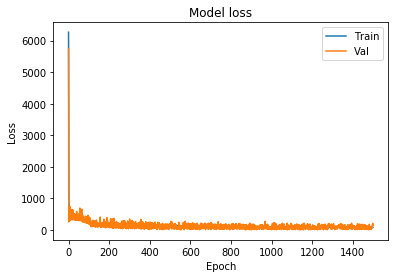

In [264]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [265]:
# serialize model to JSON
model_json = model.to_json()
with open(currentFile/modelDen, "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(currentFile/weightsDen)
print("Saved model to disk")

Saved model to disk


In [266]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [267]:
from sklearn.metrics import r2_score
r2 = r2_score(Y.tolist(), array.tolist())
print(r2)

0.9616239226608114


In [268]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [269]:
mape = mean_absolute_percentage_error(Y.tolist(), array.tolist())
print(mape)

2.099418136608814


In [270]:
myText = open(currentFile/metricsDen,'w')
r2Text = "r2: " + str(r2)
myText.write(r2Text)
mapeText = "\nmape: " + str(mape)
myText.write(mapeText)
myText.close()